[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Saving X data.csv to X data (3).csv


/tmp/ipython-input-5-3209936824.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', palette='Set2')


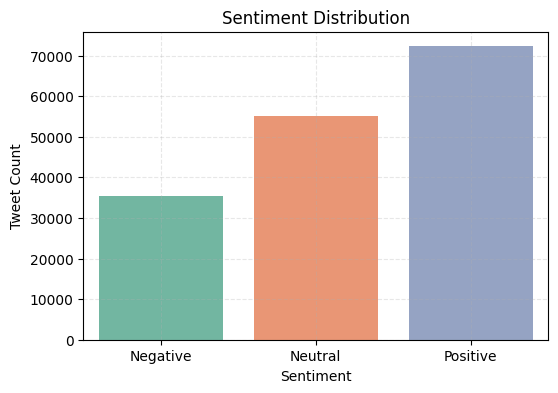

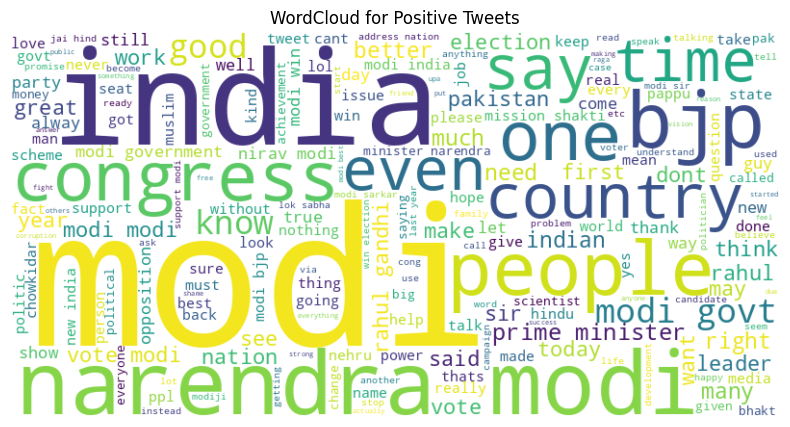

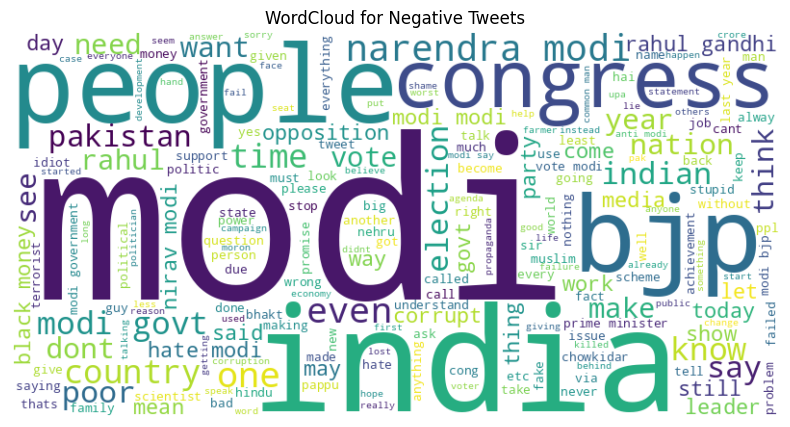

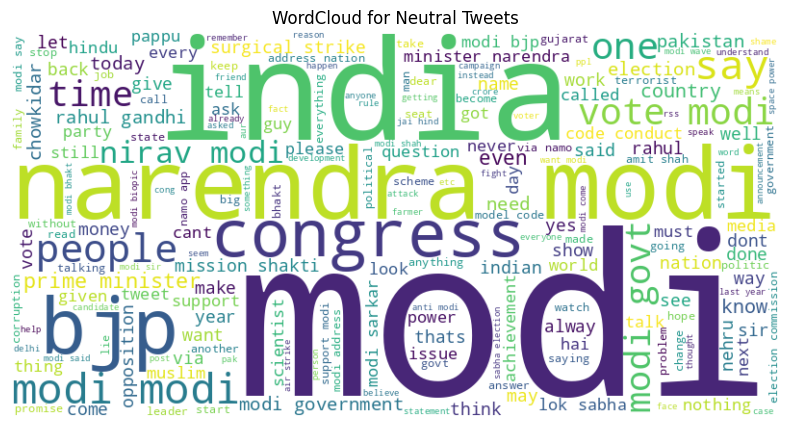


Top words in Positive tweets:
modi: 70434
india: 16064
bjp: 7048
people: 6953
like: 6084
congress: 5816
narendra: 5530
one: 4967
govt: 4893
good: 4790

Top words in Negative tweets:
modi: 35226
india: 6339
people: 4068
bjp: 3617
like: 3446
congress: 3444
govt: 2633
poor: 2627
dont: 2340
one: 2266

Top words in Neutral tweets:
modi: 49805
india: 6722
narendra: 4015
bjp: 3970
congress: 3563
vote: 3052
like: 3048
people: 2871
modis: 2624
govt: 2492


In [5]:
# Install necessary libraries
!pip install -q matplotlib seaborn wordcloud

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the missing resource

# Load dataset (adjust file path if needed)
from google.colab import files
uploaded = files.upload()

# Check if a file was uploaded
if not uploaded:
  print("No file uploaded. Please upload a CSV file.")
else:
  # Replace with your actual file name after uploading
  df = pd.read_csv(next(iter(uploaded)))

  # Rename columns for convenience
  df.columns = ['text', 'sentiment']

  # Drop missing values
  df.dropna(inplace=True)

  # Convert sentiment to string labels
  sentiment_map = {-1.0: 'Negative', 0.0: 'Neutral', 1.0: 'Positive'}
  df['sentiment_label'] = df['sentiment'].map(sentiment_map)

  # -------------------- Sentiment Distribution --------------------
  plt.figure(figsize=(6,4))
  sns.countplot(data=df, x='sentiment_label', palette='Set2')
  plt.title('Sentiment Distribution')
  plt.xlabel('Sentiment')
  plt.ylabel('Tweet Count')
  plt.grid(True, linestyle='--', alpha=0.3)
  plt.show()

  # -------------------- WordClouds by Sentiment --------------------
  stop_words = set(stopwords.words('english'))

  def generate_wordcloud(data, sentiment):
      text = ' '.join(data[data['sentiment_label'] == sentiment]['text'])
      words = word_tokenize(text.lower())
      filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
      wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(' '.join(filtered_words))
      plt.figure(figsize=(10,5))
      plt.imshow(wc, interpolation='bilinear')
      plt.axis('off')
      plt.title(f'WordCloud for {sentiment} Tweets')
      plt.show()

  for sentiment in ['Positive', 'Negative', 'Neutral']:
      generate_wordcloud(df, sentiment)

  # -------------------- Top Frequent Words by Sentiment --------------------
  def get_top_words(data, sentiment, n=10):
      text = ' '.join(data[data['sentiment_label'] == sentiment]['text'])
      words = word_tokenize(text.lower())
      filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
      return Counter(filtered_words).most_common(n)

  for sentiment in ['Positive', 'Negative', 'Neutral']:
      print(f"\nTop words in {sentiment} tweets:")
      top_words = get_top_words(df, sentiment)
      for word, freq in top_words:
          print(f"{word}: {freq}")